<a href="https://colab.research.google.com/github/CWill22/NeuroHW9/blob/main/HW9_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/cyneuro/Neural-Networks-Machine-Learning/blob/main/stats/Maximum_Likelihood_Estimation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Maximum Likelihood Estimation

This notebook assumes the data is a standard continuous normal distribution. The number of random samples, mean, and standard deviation of the distribution can be set in lines 7-9 in code cell 1.

The function `gaussian` calculates the negative log likelihood given the random samples and the initial predicted mean and standard deviations defined in initParams.

The key to the whole program is the scipy function `minimize`. It is a regular optimization function and more information about it can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

**Note:** the method can be a lot of different options, all different mathematical optimization techniques.


#### Questions:
1. If everything is working, we would expect more accurate $\mu^*$ and $\sigma^*$ predictions with more random samples. Think about why this is.
2. What happens when the initial parameter guesses are extremely off? What about when they're extremely close? How does this impact the number of samples?
3. Break down each line in the `gaussian` function. Knowing what you know about MLE, what do you think the function `stats.norm.logpdf` does?

1. We could expect more accurate predictions as with more data, there is less random variation from the expected distribution.

2. If the guesses are extremely off, it does not come up with as good of a prediction. If they are extremely close, they do end up closer to the real mean and standard deviation. Having more samples helps it converge to the true values even if the initial guesses are far off.

3. The first and second lines "mean = params[0]
    sd = params[1]" retreive the estimated mean and standard divaition passed in a params. Then for "nll = -np.sum(stats.norm.logpdf(sample_data, loc=mean, scale=sd))", stats.norm.logpdf calcules the log probability density function for the givin random data and initial parameters. This is the probability of observing a sample in the distribution with the initial parameters. The "-np.sum" takes the sum of the log probabilities for all of the samples and makes them negative so that we can find the maximum by using our existing minimum function given by the library functions.


In [11]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize
np.random.seed(1)


samples = 1000
mu      = 1.1
sigma   = 0.9


#  Take random sample from the distribution of data (normal dist in this case)
#sample_data = np.random.normal(loc=mu, scale=sigma, size=samples)
sample_data = np.random.logistic(loc=mu, scale=sigma, size=samples)

def gaussian(params):
    mean = params[0]
    sd = params[1]

    # Calculate negative log likelihood
    nll = -np.sum(stats.norm.logpdf(sample_data, loc=mean, scale=sd))

    return nll

def logistic_nll(params):
    loc = params[0]
    scale = params[1]
    # Calculate negative log likelihood for the logistic distribution
    nll = -np.sum(stats.logistic.logpdf(sample_data, loc=loc, scale=scale))
    return nll

initParams = [1, 1]

results = minimize(logistic_nll, initParams, method='Nelder-Mead')


print('Predicted: mean*  = {:.3f} std*  = {:.3f}'.format(results.x[0],results.x[1]))
print('True: mean   = {:.3f} std   = {:.3f}'.format(mu, sigma))

Predicted: mean*  = 1.103 std*  = 0.904
True: mean   = 1.100 std   = 0.900


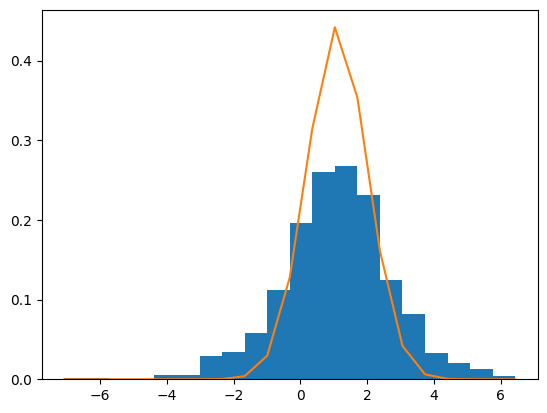

In [12]:
import matplotlib.pyplot as plt

def normal_dist(inp, mean, std):
    return 1./(np.sqrt(2.*np.pi)*std)*np.exp(-np.power((inp - mean)/std, 2.)/2)

x = np.arange(-10, 10, 0.1)
y = normal_dist(x, mu, sigma)

num_bins = 20

count, bins, ignored = plt.hist(sample_data, bins=num_bins, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))
plt.show()